# Execute the module

In [181]:
from scipy.constants import minute
import os
%run ../pdipy/core.py

pdi = PDIBacterialPkg(verbose = True, jupyter = True)
pdi.define_system(surface_area = 58, solution_depth = 1)
pdi.define_bacterium(bacterial_specie = 'Saureus')
pdi.define_photosensitizer(photosensitizer_molar = 1E-6, photosensitizer = 'A3B_4Zn')
pdi.define_light(light_source = 'LED', irradiance = 37.92,)
pdi.define_photosensitizer_volume()
pdi.singlet_oxygen_calculations(timestep = 10, total_time = 2000)
pdi.geometric_oxidation()
pdi.kinetic_calculation()
pdi.export()


# pdi.define('Saureus', 'A3B_4Zn', photosensitizer_conc = 1, light_source = 'LED', irradiance = 37.92)
# raw_data = pdi.time_to_threshold(timestep = .010, total_time = 2)

%matplotlib inline

The center porphyrin object is 6.1E-10 meters
The benzyl extension is 6.1E-10 meters
The diazirine is 7.2E-10 meters
The 0.01 m deep solution was divided into 7719162 layers
The molecular length is 1.8E-9 meters
The molecular volume is 5.0E-28 cubic meters
The photosensitizer volume proportion is 3.0E-7
The photosensitizer area proportion is 4.2E-6
photons per timestep:  0.00021744051080613172
molecular oxygen molecules:  2.8E-7
excited photosensitizer molecules:  7.9E15
effective excitation watts:  8.5E-2
oxidized volume proportion:  0.001902650954146388
volume:area consistency True



// Created by libAntimony v2.12.0.3
model *pdi_oxidation()

  // Compartments and Species:
  species ps, e_ps, so, fa, ofa;

  // Assignment Rules:
  oxidation := ofa/(ofa + fa);

  // Reactions:
  _J0: ps -> e_ps; 0.000217440510806132*ps;
  _J1: e_ps -> so; 0.48*e_ps;
  _J2: so + fa -> ofa; 246112.258064516*so*fa - 5*ofa;

  // Species initializations:
  ps = 2.30202808055389e-14;
  e_ps = 1.0432937901

,[ps],[e_ps],[so],[fa],[ofa]
Time (s),,,,,
0.000000,1.000000e-06,0.000000e+00,0.000000e+00,0.001005,0.000000e+00
603.015075,8.771062e-07,3.975101e-10,2.427456e-09,0.001005,1.200689e-07
1206.030151,7.693222e-07,3.486617e-10,4.564057e-09,0.001005,2.257651e-07
1809.045226,6.747862e-07,3.058174e-10,6.438408e-09,0.001005,3.184696e-07
2412.060302,5.918642e-07,2.682366e-10,8.082766e-09,0.001005,3.997848e-07
...,...,...,...,...,...
117587.939698,7.107497e-14,3.221163e-17,1.982714e-08,0.001004,9.801732e-07
118190.954774,5.543596e-14,2.512393e-17,1.982714e-08,0.001004,9.801732e-07
118793.969849,4.204217e-14,1.905378e-17,1.982714e-08,0.001004,9.801732e-07


C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\core.py:373: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



,parameter,value
0,simulation_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\2021-10-30-PDIpy-A3B_4Zn-Saureus-3
1,singlet_oxygen_diffusion_distance (nm),0.000000
2,oxidation_angle,5
3,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
4,solution_depth (m),0.010000
5,surface_area (m^2),0.005800
6,solution_volume (m^3),0.000058
7,bacterial_specie,Saureus
8,photosensitizer_selection,A3B_4Zn
9,soret (m),"{'upper': 4.3e-07, 'lower': 4.0000000000000003e-07}"


,variable,value
0,simulation_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\2021-10-30-PDIpy-A3B_4Zn-Saureus-3
1,center_porphyrin_length,0.000000
2,sp2_extension,0.000000
3,sp3_diazirine,0.000000
4,photosensitizers,34928416408000000.000000
5,molecular_volume (m^3),0.000000
6,volume_proportion,0.000000
7,area_proportion,0.000004
8,photon_moles_per_timestep,0.000217
9,dissolved_mo_molar,0.000000


# Surface system

The center porphyrin object is 6.1E-10 meters
The benzyl extension is 6.1E-10 meters
The diazirine is 7.2E-10 meters
The None m deep solution was divided into 1 layers
The molecular length is 1.8E-9 meters
The molecular volume is 5.0E-28 cubic meters
The photosensitizer volume proportion is 7.2E4
The photosensitizer area proportion is 1.3E6
photons per timestep:  2.6499937939966375e-05
molecular oxygen molecules:  2.8E-7
excited photosensitizer molecules:  2.3E26
effective excitation watts:  1.0E-2
oxidized volume proportion:  0.001902650954146388
volume:area consistency True



// Created by libAntimony v2.12.0.3
model *pdi_oxidation()

  // Compartments and Species:
  species ps, e_ps, mo, so, fa, ofa;

  // Assignment Rules:
  oxidation := ofa/(ofa + fa);

  // Reactions:
  _J0: ps -> e_ps; 2.64999379399664e-5*ps;
  _J1: mo -> so; 0.48*e_ps*mo - 10000000000*so;
  _J2: so + fa -> ofa; 246112.258064516*so*fa - 5*ofa;

  // Species initializations:
  ps = 9869.57757758969;
  e_ps = 227

,[ps],[e_ps],[mo],[so],[fa],[ofa]
Time (s),,,,,,
0.000000,237329.457756,0.000000,2.812605e-07,0.000000e+00,0.001005,0.000000e+00
603.015075,233567.105767,3762.351989,2.812580e-07,5.079319e-14,0.001005,2.512601e-12
1206.030151,229864.398347,7465.059409,2.812555e-07,1.007803e-13,0.001005,4.986094e-12
1809.045226,226220.392554,11109.065202,2.812530e-07,1.499740e-13,0.001005,7.420041e-12
2412.060302,222634.157297,14695.300459,2.812505e-07,1.983869e-13,0.001005,9.816128e-12
...,...,...,...,...,...,...
117587.939698,10521.031107,226808.426649,2.811060e-07,3.060347e-12,0.001005,1.514387e-10
118190.954774,10354.243441,226975.214315,2.811059e-07,3.062596e-12,0.001005,1.515500e-10
118793.969849,10190.099824,227139.357932,2.811058e-07,3.064809e-12,0.001005,1.516595e-10


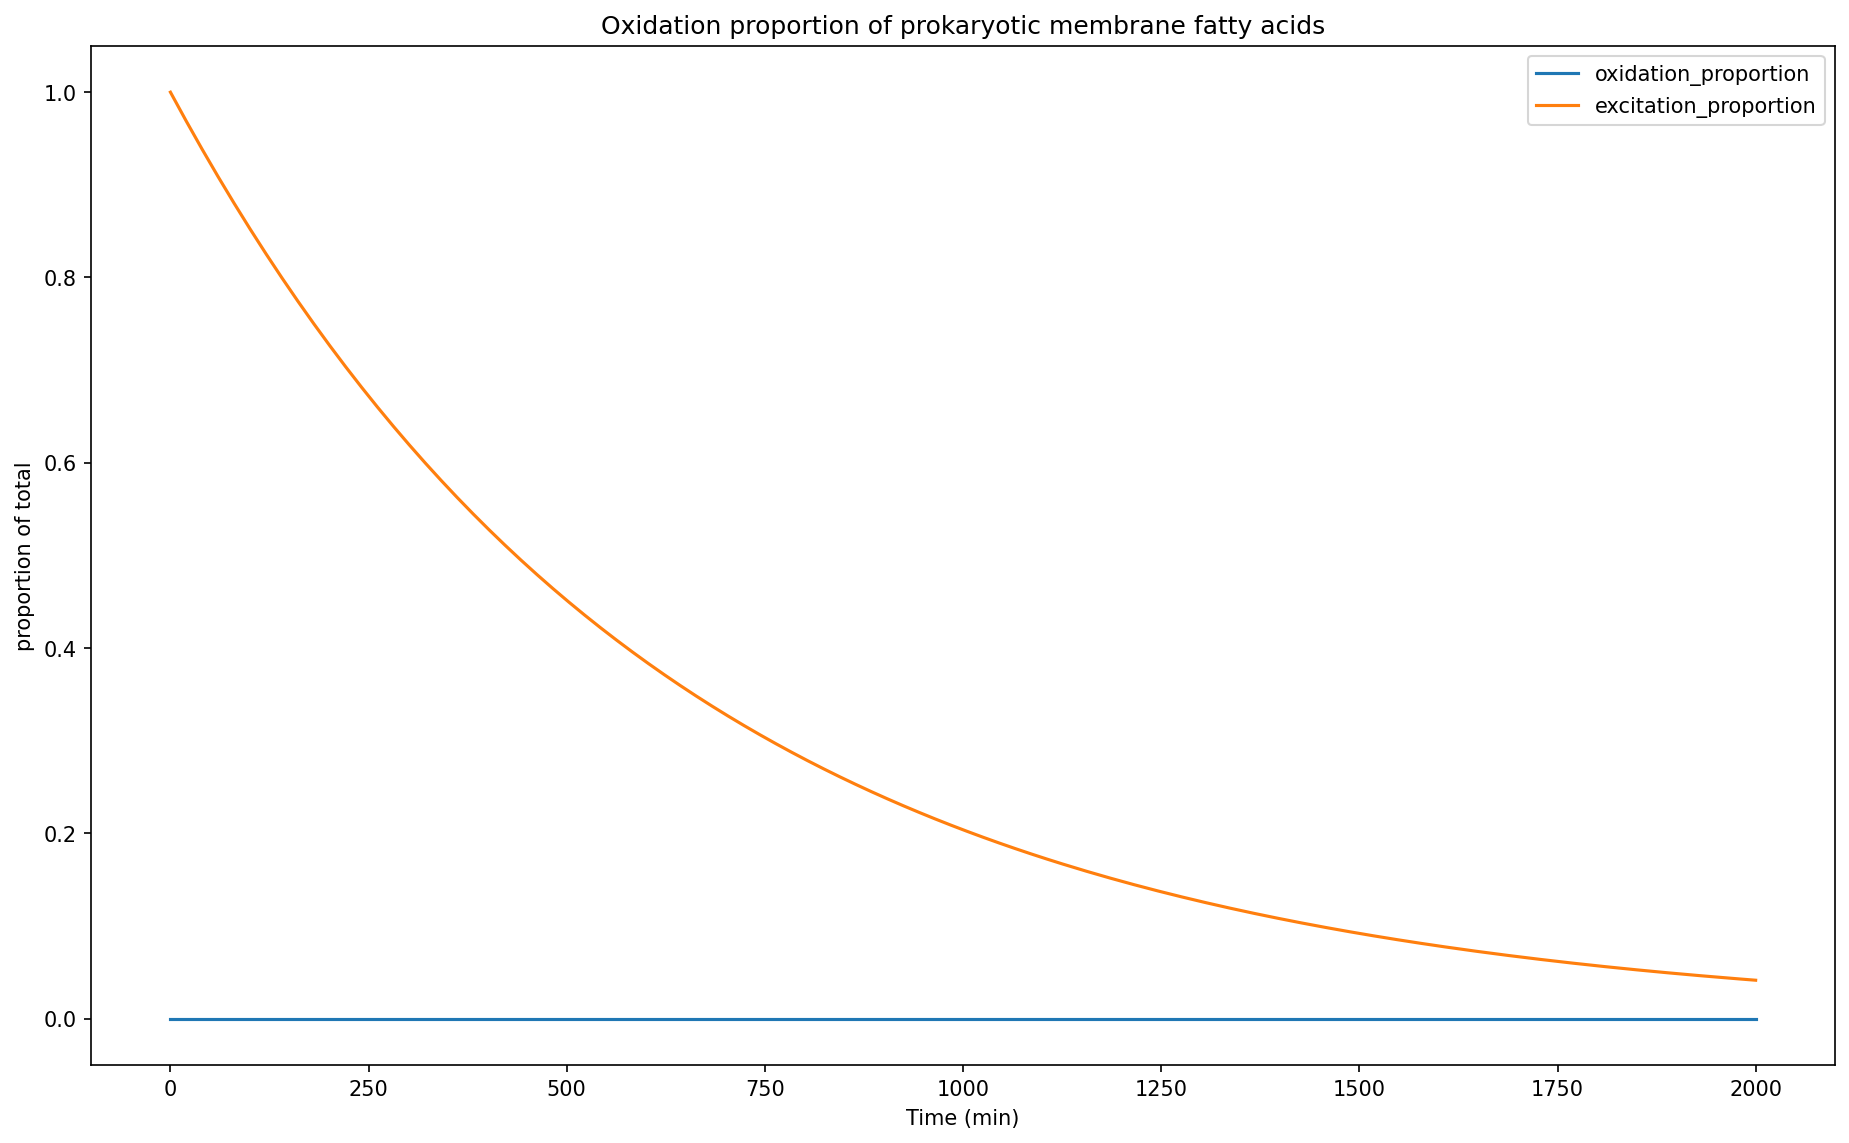

,parameter,value
0,simulation_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\2021-10-31-PDIpy-A3B_4Zn-Saureus-6
1,singlet_oxygen_diffusion_distance (nm),0.000000
2,oxidation_angle,5
3,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
4,medium,water
5,photosensitizer_mg_per_disc,0.300000
6,cm2_per_disc,7.068583
7,surface_area (m^2),0.000707
8,photosensitizer_mg_per_sqr_cm,0.042441
9,bacterial_specie,Saureus


,variable,value
0,simulation_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\2021-10-31-PDIpy-A3B_4Zn-Saureus-6
1,center_porphyrin_length,0.000000
2,sp2_extension,0.000000
3,sp3_diazirine,0.000000
4,photosensitizers,172847545923446210560.000000
5,molecular_volume (m^3),0.000000
6,volume_proportion,71958.746055
7,area_proportion,1322859.744385
8,photon_moles_per_timestep,0.000026
9,mo_relaxation,10000000000.000000


In [204]:
%run ../pdipy/core.py

pdi = PDIBacterialPkg(verbose = True, jupyter = True)
pdi.define_system(surface_system = True,)
pdi.define_bacterium(bacterial_specie = 'Saureus')
pdi.define_photosensitizer(photosensitizer_molar = 1E-6, photosensitizer = 'A3B_4Zn')
pdi.define_light(light_source = 'LED', irradiance = 37.92,)
pdi.define_photosensitizer_volume()
pdi.singlet_oxygen_calculations(timestep = 10, total_time = 2000)
pdi.geometric_oxidation()
pdi.kinetic_calculation()
pdi.export()


# pdi.define('Saureus', 'A3B_4Zn', photosensitizer_conc = 1, light_source = 'LED', irradiance = 37.92)
# raw_data = pdi.time_to_threshold(timestep = .010, total_time = 2)

%matplotlib inline

# brainstorming

In [ ]:
import pdipy

pdi = pdipy.PDIBacterialPkg()
print(pdi.results)

// Created by libAntimony v2.12.0.3
model *pdi_oxidation()

  // Compartments and Species:
  species o, so, bcfa, ofa;

  // Assignment Rules:
  oxidation := ofa/(ofa + bcfa);

  // Reactions:
  _J0: o -> so; 1e-9*o;
  _J1: so + bcfa -> ofa; 12*so*bcfa;

  // Species initializations:
  o = 130000000000;
  so = 0;
  bcfa = 1000;
  ofa = 0;

  // Variable initializations:
  biofilm = 0.05;
  vitality = 0.1;

  // Other declarations:
  var oxidation;
  const biofilm, vitality;
end


Current integrator: 
 < roadrunner.Integrator() >
  name: cvode
  settings:
      relative_tolerance: 0.000001
      absolute_tolerance: 0.000000000001
                   stiff: true
       maximum_bdf_order: 5
     maximum_adams_order: 12
       maximum_num_steps: 20000
       maximum_time_step: 0
       minimum_time_step: 0
       initial_time_step: 0
          multiple_steps: false
      variable_step_size: false
         max_output_rows: 100000



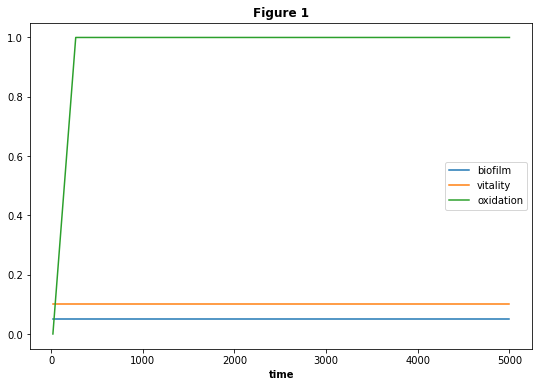

In [140]:
import tellurium

# define the first equation
k_so = 1e-9
mo = 1.3e11

# define the second equation
k = 12
bcfa = 1e3

# define constants
healing_kinetics = 3
biofilm_threshold = .05
death_threshold = 0.1

# define the SBML model
model = (f'''
  model pdi_oxidation
    # expressions
    o -> so;  {k_so}*o
    so + bcfa -> ofa; {k}*so*bcfa #- {healing_kinetics}*ofa    # the aggregated photons / second must be programmatically inserted into the rate expression         

    # define the first expression 
    o = {mo}

    # define the second expression
    so = 0
    ofa = 0
    bcfa = {bcfa}

    # define constants
    biofilm = {biofilm_threshold};
    vitality = {death_threshold};
    oxidation := ofa / (ofa + bcfa);

  end
''')
tellurium_model = tellurium.loada(model)
print(tellurium_model.getCurrentAntimony())
print('\nCurrent integrator:', '\n', tellurium_model.integrator)


# define the SEDML plot
initial_time = 20
final_time = 5000
total_points = 20
phrasedml_str = '''
  model1 = model "pdi_oxidation"
  sim1 = simulate uniform({}, {}, {})
  task1 = run sim1 on model1
  plot "Figure 1" time vs biofilm, vitality, oxidation
'''.format(initial_time, final_time, total_points)

# create, execute, and export an OMEX file
inline_omex = '\n'.join([model, phrasedml_str])               
tellurium.executeInlineOmex(inline_omex)